✅ Dataset loaded successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain

C:\Users\rajea\AppData\Local\Temp\ipykernel_19400\1968023003.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)



✅ Model Accuracy: 0.9900

Confusion Matrix:
 [[122   0]
 [  2  76]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       122
           1       1.00      0.97      0.99        78

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



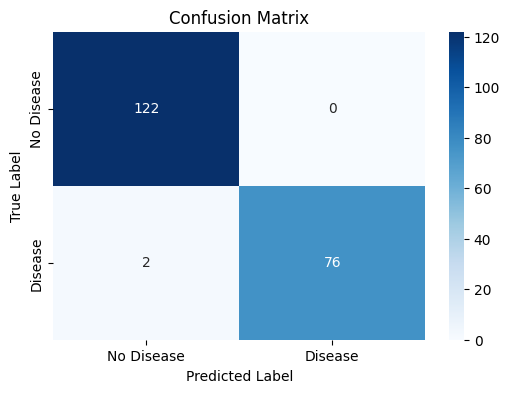


✅ Model saved as heart_disease_model.pkl
✅ Scaler saved as scaler.pkl


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier  # Try using a Random Forest model

# Load dataset
file_path = 'heart_disease_dataset.csv'  # Ensure the correct file path
try:
    data = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    raise FileNotFoundError(f"File not found at {file_path}, please check the path.")

# Display dataset info
data.info()

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Rename 'Heart Disease' column to 'target' if needed
if 'Heart Disease' in data.columns:
    data.rename(columns={'Heart Disease': 'target'}, inplace=True)
else:
    raise KeyError("❌ Column 'Heart Disease' not found in the DataFrame.")

# Fill missing values with the most frequent value for categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if data[col].isnull().sum() > 0:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Encode categorical features (use LabelEncoder for binary categories)
binary_categorical_cols = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina']
for col in binary_categorical_cols:
    data[col] = LabelEncoder().fit_transform(data[col])

# Encode 'Chest Pain Type' (it seems to have multiple categories)
data['Chest Pain Type'] = LabelEncoder().fit_transform(data['Chest Pain Type'])

# Define features (X) and target (y)
X = data.drop(columns=['target'])
y = data['target']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier (alternative to Logistic Regression)
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')  # Using class_weight='balanced' to handle imbalance
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\n✅ Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Save the model and scaler
model_filename = "heart_disease_model.pkl"
scaler_filename = "scaler.pkl"

with open(model_filename, "wb") as model_file:
    pickle.dump(model, model_file)

with open(scaler_filename, "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

print(f"\n✅ Model saved as {model_filename}")
print(f"✅ Scaler saved as {scaler_filename}")
